<a href="https://colab.research.google.com/github/rkti498/e_shikaku/blob/main/02_machine_learning_enshu02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 機械学習　演習　つづき

### 後半 主成分分析、アルゴリズム、SVM

#### 主成分分析



In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
from pprint import pprint
import lightgbm

In [ ]:
print(np.__version__)
print(pd.__version__)

1.19.5
1.1.5


x_1_mean:  2.4788976136540706
x_2_mean:  3.575013308992982
[2.739137061993336, 2.297726638350044, 2.0465701504695466, 2.5123187144322308, 2.0142383981079313, 2.0999984969854766, 2.3025907206822316, 2.1269114517080814, 2.9578184107081, 2.637733881417911, 2.0509559274116818, 2.9246823363324674, 2.0648582859454243, 2.707127302741993, 2.211676899817596, 2.6667216111796037, 2.9605484280248695, 2.443463223026553, 2.8583839139399596, 2.668642439399084, 2.928738778262046, 2.433515229091165, 2.1667413669575817, 2.450858534195633, 2.9219576323221776, 2.839891632521834, 2.023154121011913, 2.7020891166705274, 2.0630896902065943, 2.5447880157085403, 0.2602394483392656, -0.1811709753040267, -0.432327463184524, 0.033421100778160184, -0.4646592155461393, -0.378899116668594, -0.176306892971839, -0.3519861619459892, 0.47892079705402946, 0.1588362677638404, -0.4279416862423888, 0.44578472267839686, -0.41403932770864627, 0.22822968908792252, -0.2672207138364744, 0.18782399752553314, 0.48165081437079893, -

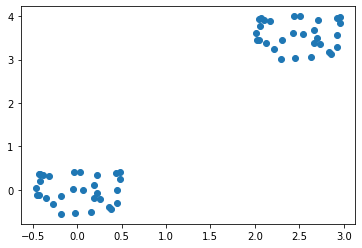

In [ ]:
x_1 = [np.random.rand() + 2 for x in range(30)]
x_2 = [np.random.rand() + 3 for x in range(30)]
x_1_mean = np.array(x_1).mean()
print("x_1_mean: ", x_1_mean)
x_2_mean = np.array(x_2).mean()
print("x_2_mean: ", x_2_mean)
x_3 = x_1 - x_1_mean
x_4 = x_2 - x_2_mean
x_1.extend(x_3.tolist())
x_2.extend(x_4.tolist())
print(x_1)
plt.scatter(x_1, x_2)

# サポートベクターマシン

####非線形分類

In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=4ce4abb8ea8b78cfa0eef820d1d4fced83dae298521ffa0df25d8f3f9d16a433
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [3]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons



In [4]:
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

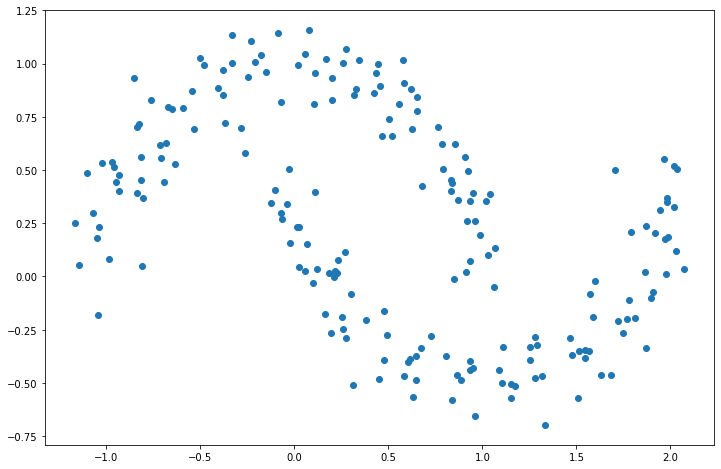

In [10]:
X = moons[0]
y = moons[1]
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

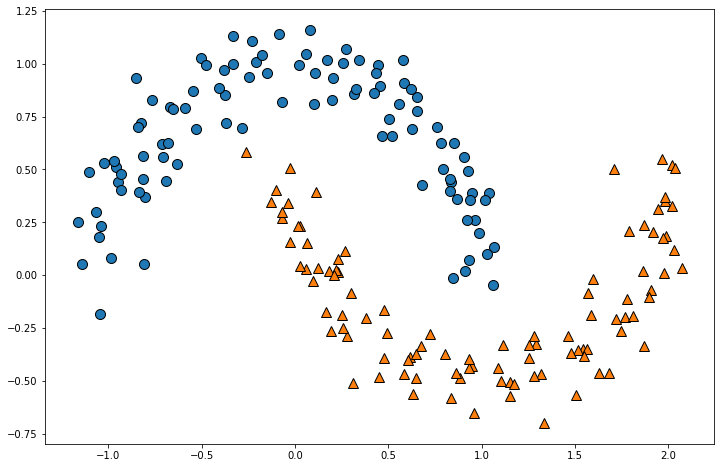

In [18]:
X = moons[0]
y = moons[1]
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

### 非線形分類
2次元空間を10次元特徴空間に写像して分類する。
（カーネル法は使用しない）




In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


Text(0, 0.5, '$x_1s')

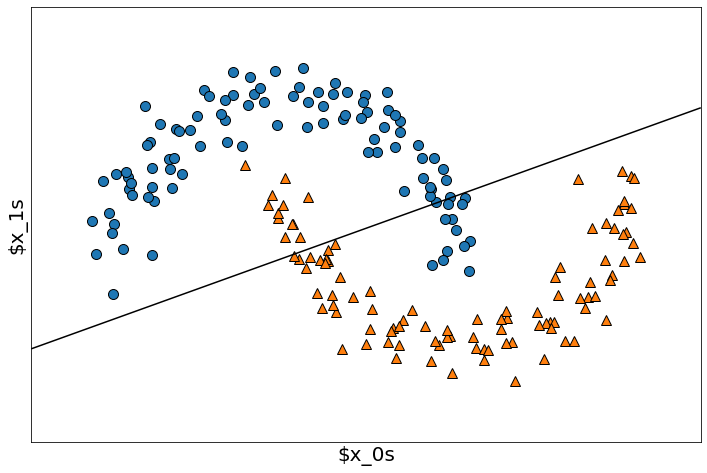

In [22]:
lin_svm = LinearSVC().fit(X_train_scaled, y_train)
plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(lin_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("$x_0s", fontsize=20)
plt.ylabel("$x_1s", fontsize=20)

# 線形分離不可能であることを、いちおう確認

In [23]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_train_poly.shape)  # 10次元になっていることがわかる。

print(X_train_poly)


(150, 10)
[[ 1.00000000e+00  8.86813848e-01 -4.84896235e-01 ... -3.81341214e-01
   2.08511538e-01 -1.14010917e-01]
 [ 1.00000000e+00  9.24799914e-01  4.94247065e-01 ...  4.22707215e-01
   2.25910272e-01  1.20734753e-01]
 [ 1.00000000e+00 -7.63797985e-01  8.26528213e-01 ...  4.82186114e-01
  -5.21787743e-01  5.64641828e-01]
 ...
 [ 1.00000000e+00 -9.68196502e-01  5.38851311e-01 ...  5.05121626e-01
  -2.81126249e-01  1.56461263e-01]
 [ 1.00000000e+00 -6.70964946e-01  7.93803059e-01 ...  3.57365342e-01
  -4.22790644e-01  5.00193800e-01]
 [ 1.00000000e+00 -2.68526403e-02  5.04722011e-01 ...  3.63937020e-04
  -6.84055729e-03  1.28575060e-01]]


In [24]:
# これで10次元がどのように構成されているかが分かる。
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [26]:
X_train_scaled_poly = scaler.fit_transform(X_train_poly)
X_test_scaled_poly = scaler.fit_transform(X_test_poly)

lin_svm = LinearSVC().fit(X_train_scaled_poly, y_train)
lin_svm.predict(X_test_scaled_poly) == y_test
# 的中率をみる → パーフェクト

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])